# Numeric Feautures

## Feauture Preprocessing

- Tree base Models **NO** depends of Scaling
- Non-Tree base Models **YES** depends of Scaling

### Scaling: MinMaxScaler

In [6]:
import pandas as pd
%matplotlib inline

train = pd.read_csv('titanic/train.csv')

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f426cbfd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f0f425a7320>]], dtype=object)

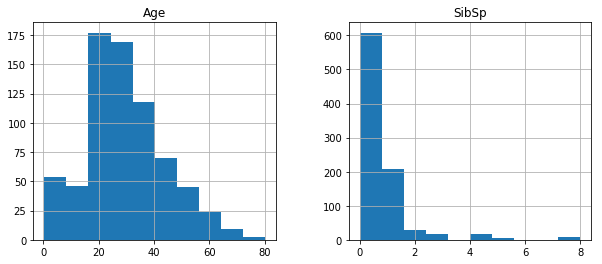

In [19]:
train[['Age','SibSp']].hist(figsize=(10,4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f42517198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f0f42369c50>]], dtype=object)

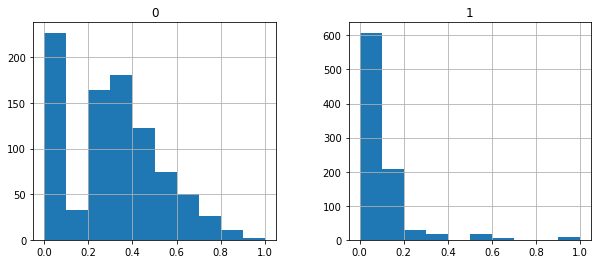

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(train[['Age','SibSp']].fillna(0))
pd.DataFrame(xtrain).hist(figsize=(10,4))

### Scaling: StandardScaler

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f42506a58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f0f424970b8>]], dtype=object)

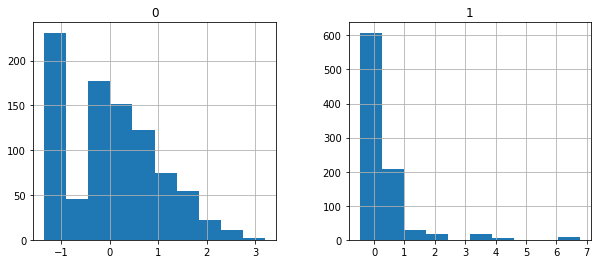

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(train[['Age','SibSp']].fillna(0))
pd.DataFrame(xtrain).hist(figsize=(10,4))

### Rank

In [79]:
import scipy.stats as ss
print(ss.rankdata([-100,0,1e5]))
print(ss.rankdata([1000,1,10]))

[ 1.  2.  3.]
[ 3.  1.  2.]


### Log transform

In [78]:
import numpy as np
x = range(50)
pd.DataFrame(np.log1p(x), columns=['Log + 1']).head()

,Log + 1
0,0.000000
1,0.693147
2,1.098612
3,1.386294
4,1.609438


### Raising to the power < 1

In [76]:
x = np.array(range(50))
pd.DataFrame(np.sqrt(x+2/3)).head()

,0
0,0.816497
1,1.290994
2,1.632993
3,1.914854
4,2.160247


## Feauture Generation

### Fractional Part

In [75]:
pd.DataFrame(np.column_stack(divmod(np.log1p(x),1)), columns=['Int','Fractional Part']).head()

,Int,Fractional Part
0,-0.0,0.000000
1,0.0,0.693147
2,1.0,0.098612
3,1.0,0.386294
4,1.0,0.609438


# Categorical and Ordinal feautures

In [91]:
train[['Pclass','Sex','Cabin','Embarked']].head()

,Pclass,Sex,Cabin,Embarked
0,3,male,NaN,S
1,1,female,C85,C
2,3,female,NaN,S
3,1,female,C123,S
4,3,male,NaN,S


### Alphabetical (sorted)

It will sort as follows [S,C,Q] -> [2,0,1]

In [119]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit_transform(np.ravel(train[['Embarked']].values.tolist()))

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1,
       2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 1, 2,
       1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 3, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0,
       2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2,
       0, 1,

### Order of Appearance

It will sort as follows [S,C,Q] -> [0,1,2]

In [126]:
pd.factorize(train['Embarked'])

(array([ 0,  1,  0,  0,  0,  2,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  2,
         0,  0,  1,  0,  0,  2,  0,  0,  0,  1,  0,  2,  0,  1,  1,  2,  0,
         1,  0,  1,  0,  0,  1,  0,  0,  1,  1,  2,  0,  2,  2,  1,  0,  0,
         0,  1,  0,  1,  0,  0,  1,  0,  0,  1, -1,  0,  0,  1,  1,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  2,  0,  1,  0,  0,  1,  0,  2,  0,  1,
         0,  0,  0,  1,  0,  0,  1,  2,  0,  1,  0,  1,  0,  0,  0,  0,  1,
         0,  0,  0,  1,  1,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  2,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  2,
         0,  2,  0,  0,  0,  0,  0,  1,  1,  2,  0,  2,  0,  0,  0,  0,  1,
         0,  0,  0,  1,  2,  1,  0,  0,  0,  0,  2,  1,  0,  0,  1,  0,  0,
         0, 